**Top Wines in the World**
\
Abstract
\
Wine has been made and drank since at least 6000 B.C. In 2020, Americans consumed an estimated 1 billion gallons of wine according to Wine Institute. The population of wine drinkers has increased in the last year due to COVID-19 due to the lockdowns and drinking outside of mealtimes. The purpose of this research is to determine which wine variety is the most popular based on points along with price and country. The topic is of interest as it can be shared with consumers to guide in their wine purchase by finding the relationships between the variables. The dataset I will be using is 150k wine in the US against various variables such as designation, points, price, region, variety, and winery. The data was scraped from WineEnthusiast by zackthoutt which can be found on Kaggle. You may download the file from https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data_first150k.csv At the end of this research, we will be able to find out which type of wine has the highest price and points as well as the country that produces it.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
review = pd.read_csv('winemag-data_first150k.csv')
review

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
#Data Cleaning and Preparation

#Remove first column as it is a duplicate of the index
review = review.iloc[: , 1:]

#Column description
review.columns.tolist()
data = {'variables': review.columns.tolist(),
        'details': ["Country where the wine is from","Description of the wine by winery","Brand name of wine",
"95-100:Outstanding, 90-94:Excellent, 85-89:Very good, 80-84:Good", "Price of wine in USD", "State of winery",
"City of winery", "Neighborhood of winery", "Variety of wine", "Name of winery"]}
description = pd.DataFrame(data, columns = ['variables','details'])
description

#Rename column name to have have describe the column better
review.rename(columns = {'variety':'wine'}, inplace = True)

#Drop NA values in numeric dataset
review = review.dropna(subset=['country','price','wine'])
review

,country,description,designation,points,price,province,region_1,region_2,wine,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [5]:
#Summary Statistics
perc =[.25, .50, .75]
overview = review.describe(percentiles = perc)
print (overview)
#The mean point of wine is 87.89 and the mean price of wine is 33.13.

              points          price
count  137230.000000  137230.000000
mean       87.788035      33.132019
std         3.221572      36.323072
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000


<AxesSubplot:xlabel='price'>

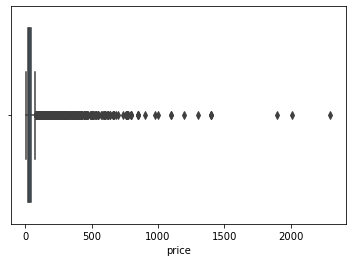

In [6]:
#Price Outliers

#With such a large dataset, we would assume that there are outliers in it. We can identify them using boxplots
import seaborn as sns
sns.boxplot(x=review["price"])
#As we can see in the boxplot, there are a lot of outliers after $100.

<AxesSubplot:xlabel='points'>

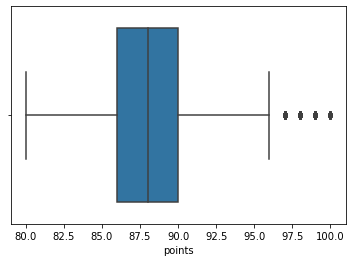

In [7]:
#Points Outliers
sns.boxplot(x=review["points"])
#As we can see in the boxplot, there are outliers after 96 points.

In [8]:
#Removing Outliers
#We can generate a new dataframe without the outliers
n_review = review[review['price']<=100]
n_review = n_review[n_review['points']<=96]

perc =[.25, .50, .75]
n_overview = n_review.describe(percentiles = perc)
print (n_overview)
#After removing the outliers, the mean of the price was reduced from $33.13 to $29.22, whereas the mean of the points was reduced from 87.79 to 87.64.
#The mean for points did not change much as it is a large dataset with not too many points outliers.

              points          price
count  133589.000000  133589.000000
mean       87.642306      29.216111
std         3.102046      18.675496
min        80.000000       4.000000
25%        85.000000      15.000000
50%        87.000000      24.000000
75%        90.000000      38.000000
max        96.000000     100.000000


In [9]:
#Analysis
byprice = review.sort_values(['points','price',], ascending=False)
display(byprice.iloc[0:5,[3,0,4,8]])
byoutprice = n_review.sort_values(['points','price'], ascending=False)
display(byoutprice.iloc[0:5,[3,0,4,8]])

#By price with outliers, we can see that France is the highest points in wine with Chardonnay.
#By price with removed outliers, we can see that US holds the highest points in wine with Pinot Noir.

,points,country,price,wine
26296,100,France,1400.0,Chardonnay
51886,100,France,1400.0,Chardonnay
83536,100,France,1400.0,Chardonnay
2145,100,France,848.0,Bordeaux-style White Blend
24151,100,Italy,460.0,Merlot


,points,country,price,wine
10519,96,US,100.0,Syrah
10520,96,Austria,100.0,Traminer
10596,96,France,100.0,Riesling
10597,96,US,100.0,Pinot Noir
24170,96,Italy,100.0,Red Blend


In [10]:
#Data Wrangling

#Country and price multiple index
#We can observe the various prices on different wine in each country clearly with this new dataset.
CPW = n_review.set_index(['country','price','wine'])
CPW.sort_index()

#Here we can see all the different price levels the country has. 
n_review.groupby('country')['price'].unique()
n_review.groupby('country')['price'].nunique()
#France and Italy are tied in the most prices of 96. 

#We can also see all the types of wine that the country produces.
n_review.groupby('country')['wine'].unique()
n_review.groupby('country')['wine'].nunique()
#U.S. produces the most type of wine with 216 variety. Italy has the second highest with 174 variety. 

country
Albania                     1
Argentina                  65
Australia                  78
Austria                    50
Bosnia and Herzegovina      2
Brazil                      8
Bulgaria                   16
Canada                     29
Chile                      60
China                       2
Croatia                    17
Cyprus                      5
Czech Republic              6
England                     2
France                    120
Georgia                     7
Germany                    36
Greece                     43
Hungary                    29
India                       4
Israel                     36
Italy                     174
Japan                       1
Lebanon                     5
Lithuania                   1
Luxembourg                  2
Macedonia                   5
Mexico                     18
Moldova                    18
Montenegro                  1
Morocco                     8
New Zealand                33
Portugal                   74
Ro

In [11]:
#Changing the data into long format would be great to set a column as identifier
x = n_review.iloc[:,[0,3,4,8]]
x = pd.melt(x,id_vars=['country'])
x

#As mentioned above, France and Italy has the most price levels.
p1 = x[x['country'] == 'France'] 
p2 = p1[p1['variable'] == 'price']
print ("The lowest price of wine in France is $", p2['value'].min())
print ("The highest price of wine in France is $", p2['value'].max())

p3 = x[x['country'] == 'Italy'] 
p4 = p3[p3['variable'] == 'price']
print ("The lowest price of wine in France is $", p4['value'].min())
print ("The highest price of wine in France is $", p4['value'].max())


#As mentioned above, U.S. has the most type of wine.
w1 = x[x['country'] == 'US'] 
w2 = w1[w1['variable'] == 'wine']
w2['value'].value_counts()
#US produces Pinot Noir the most, and Cabernet Sauvignon comes after.

The lowest price of wine in France is $ 5.0
The highest price of wine in France is $ 100.0
The lowest price of wine in France is $ 5.0
The highest price of wine in France is $ 100.0


Pinot Noir                10169
Cabernet Sauvignon         8526
Chardonnay                 8079
Syrah                      4223
Zinfandel                  3785
                          ...  
Viognier-Valdiguié            1
Pinot-Chardonnay              1
Jacquez                       1
Rosato                        1
Pinot Blanc-Chardonnay        1
Name: value, Length: 216, dtype: int64

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

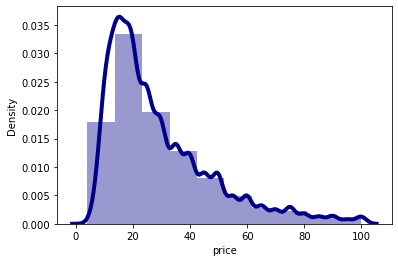

In [12]:
#Data Plotting and Visualization

#As mentioned earlier, boxplot is a great way to identify outliers in a dataset.

#I will be using density distribution to identify the mode of the price and point levels.

#Price Density Distribution
sns.distplot(n_review['price'], hist=True, kde=True, 
             bins=10, color = 'darkblue',
             kde_kws={'linewidth': 4})
#As we can see from the price density distribution plot, we can see that most wines in the world are priced at $20. 

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points', ylabel='Density'>

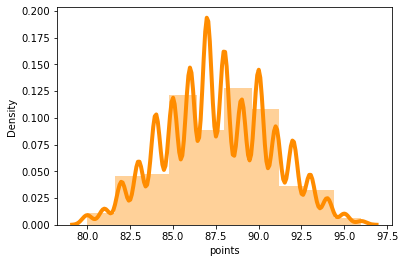

In [13]:
#Points Density Distribution
sns.distplot(n_review['points'], hist=True, kde=True, 
             bins=10, color = 'darkorange',
             kde_kws={'linewidth': 4})
#Based on the points density distribution plot, 85 points and 89 points have the tallest points, but 87 is the mode of the points.

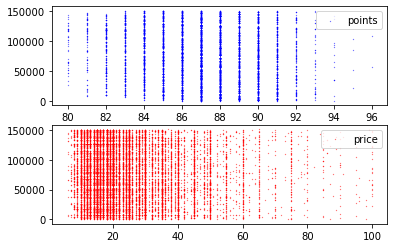

In [14]:
#We can use subplots to see the correlation between price and points.I have broken down into wine of $20 and 87 points based on my findings above.
pr_review = n_review[n_review['price']==20]
po_review = n_review[n_review['points']==87]

fig, axs = plt.subplots(2)
axs[0].scatter(pr_review['points'], pr_review.index, color="blue", label="points", s=0.05)
axs[0].legend(loc="upper right")
axs[1].scatter(po_review['price'], po_review.index, color="red", label = "price", s=0.05)
axs[1].legend(loc="upper right")

#We can see that at $20, most of the wine is at 87 to 88 points, which is very close to the density distribution above. 
#At 87 points, most wines are priced in the $18 to $20 range. 

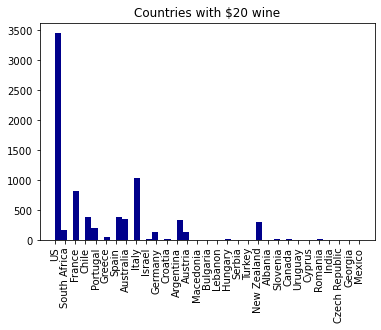

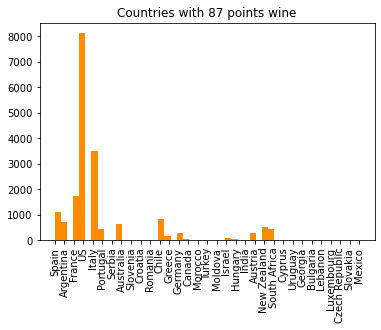

In [15]:
#Country stats
plt.hist(pr_review['country'], bins=50, color="darkblue")
plt.xticks(rotation=90)
plt.title('Countries with $20 wine')
plt.show()

plt.hist(po_review['country'], bins=50, color="darkorange")
plt.xticks(rotation=90)
plt.title('Countries with 87 points wine')
plt.show()

#U.S has the highest amount of wine that costs $20 and 87 points, while Italy comes second.      

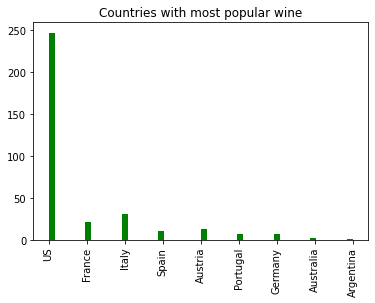

In [16]:
#Countries with the highest point wine
#Points determine the popularity of the wine as it is measured by votes of the reviewers. 
#As we have previously seen, the dataset suggests that 96 points is the highest.

pop_review = n_review[n_review['points']==96]
plt.hist(pop_review['country'], bins=50, color="green")
plt.xticks(rotation=90)
plt.title('Countries with most popular wine')
plt.show()

In [20]:
#Data Aggregation and Grouping

#Our key variables are country, wine type, price and points. 
#Using the groupby and aggregate functions, I will be extracting the mean, minimum, and maximum of price and points of each wine in the respective countries.

#Price-Country-Wine 
n_review.groupby(['country','wine'])['price'].agg(['mean','min','max'])

#Points-Country-Wine
n_review.groupby(['country','wine'])['points'].agg(['mean','min','max'])

#I further looked into U.S.' wine as it has the most wine with 96 points (most popular)
#Sauvignon Gris has the highest mean point of 94, whereas the price for it is $40. This might not be accurate as there was only one entry for Sauvignon Gris in the U.S.
#Scheurebe is the second highest with a mean point of 93.5, with a range of 92 to 95 points. The price for this is $50.

mean  min  max
country   wine                                           
Albania   Kallmet                     88.000000   88   88
Argentina Barbera                     85.000000   85   85
          Bonarda                     86.225166   81   92
          Bordeaux-style Red Blend    89.350515   81   96
          Bordeaux-style White Blend  83.000000   83   83
...                                         ...  ...  ...
Uruguay   Rosé                        80.000000   80   80
          Tannat                      84.354839   80   89
          Tannat-Merlot               87.000000   87   87
          Tannat-Syrah                84.000000   84   84
          Viognier                    84.714286   83   86

[1436 rows x 3 columns]

In [22]:
#Summary and Conclusion

#Backing to the purpose of the research, we are trying to determine which wine variety is the most popular based on points, price and country.
#Based on my findings, I would say that U.S, France, and Italy are the top 3 countries in the wine market.

#I will be extracting these 3 countries for my analysis.
top = n_review[(n_review['country'] == 'US') | (n_review['country'] == 'France') | (n_review['country'] == 'Italy')]
top_group = top.set_index(['country','points','wine'])
top_group.sort_index()
top_group

#US has the most popular wine at 96 points with Sauvignon Blanc at $90 and Pinot Noir at $65.

description  \
country points wine                                                                    
US      96     Sauvignon Blanc     Mac Watson honors the memory of a wine once ma...   
               Pinot Noir          This spent 20 months in 30% new French oak, an...   
France  95     Provence red blend  This is the top wine from La Bégude, named aft...   
US      95     Pinot Noir          This re-named vineyard was formerly bottled as...   
               Pinot Noir          The producer sources from two blocks of the vi...   
...                                                                              ...   
Italy   91     White Blend         Many people feel Fiano represents southern Ita...   
France  91     Champagne Blend     Offers an intriguing nose with ginger, lime an...   
Italy   91     White Blend         This classic example comes from a cru vineyard...   
France  90     Champagne Blend     A perfect salmon shade, with scents of peaches...   
Italy   90     Pinot Grigio        More Pinot Grigios should taste like this. A r...   

                                                     designation  price  \
country points wine                                                       
US      96     Sauvignon Blanc     Special Selected Late Harvest   90.0   
               Pinot Noir                                Reserve   65.0   
France  95     Provence red blend                     La Brûlade   66.0   
US      95     Pinot Noir                                 Silice   65.0   
               Pinot Noir                   Gap's Crown Vineyard   60.0   
...                                                          ...    ...   
Italy   91     White Blend                                   NaN   20.0   
France  91     Champagne Blend                    Cuvée Prestige   27.0   
Italy   91     White Blend                         Terre di Dora   20.0   
France  90     Champagne Blend                   Grand Brut Rosé   52.0   
Italy   90     Pinot Grigio                                  NaN   15.0   

                                             province            region_1  \
country points wine                                                         
US      96     Sauvignon Blanc             California      Knights Valley   
               Pinot Noir                      Oregon   Willamette Valley   
France  95     Provence red blend            Provence              Bandol   
US      95     Pinot Noir                      Oregon  Chehalem Mountains   
               Pinot Noir                  California        Sonoma Coast   
...                                               ...                 ...   
Italy   91     White Blend             Southern Italy   Fiano di Avellino   
France  91     Champagne Blend              Champagne           Champagne   
Italy   91     White Blend             Southern Italy   Fiano di Avellino   
France  90     Champagne Blend              Champagne           Champagne   
Italy   90     Pinot Grigio        Northeastern Italy          Alto Adige   

                                            region_2                 winery  
country points wine                                                          
US      96     Sauvignon Blanc                Sonoma               Macauley  
               Pinot Noir          Willamette Valley                  Ponzi  
France  95     Provence red blend                NaN   Domaine de la Bégude  
US      95     Pinot Noir          Willamette Valley              Bergström  
               Pinot Noir                     Sonoma              Blue Farm  
...                                              ...                    ...  
Italy   91     White Blend                       NaN  Feudi di San Gregorio  
France  91     Champagne Blend                   NaN              H.Germain  
Italy   91     White Blend                       NaN              Terredora  
France  90     Champagne Blend                   NaN                 Gosset  
Italy   90    